# Overfitting the test set

- Load `cancer.csv` dataset
- Scale the feature set
- Split data into first trainval and test, then split trainval into validation and train datasets
- Fit train dataset for `k=5` neighbors
- print the score on validation and test datasets

In [1]:
import pandas as pd
data = pd.read_csv('cancer.csv')

In [2]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [5]:
X = data.drop('y', axis=1)

In [6]:
y = data.y

In [7]:
type(X)

pandas.core.frame.DataFrame

In [8]:
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

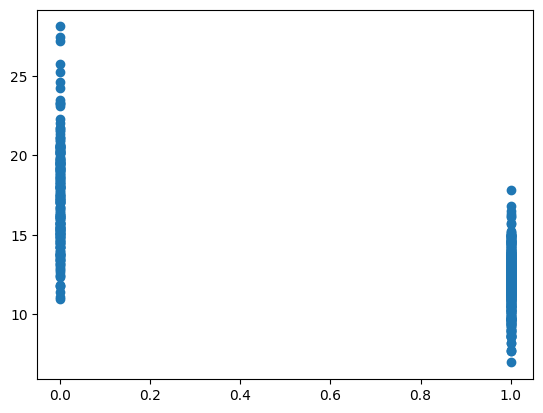

In [9]:
import matplotlib.pyplot as plt
plt.scatter(y,X.iloc[:,0])

In [10]:
(X.iloc[:,0] - X.iloc[:,0].mean()).mean()

-4.995028019403165e-16

In [11]:
from sklearn.preprocessing import scale

X_s = scale(X)

In [12]:
type(X)

pandas.core.frame.DataFrame

In [13]:
type(X_s)

numpy.ndarray

In [15]:
X_s[:,0].mean()

-1.3736327053358703e-16

In [14]:
X.iloc[:,0].mean()

14.127291739894552

In [16]:
X_s[:,0].std()

1.0

In [17]:
len(X_s[(X_s[:,0]>-3) & (X_s[:,0]<3)])/len(X_s[:,0])

0.9912126537785588

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X_s,y,random_state=0)

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X_trainval,y_trainval,random_state=0)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn5 = KNeighborsClassifier(n_neighbors = 5)

In [23]:
import numpy as np
np.unique(y)

array([0., 1.])

In [24]:
knn5.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
print(knn5.score(X_val, y_val))
print(knn5.score(X_test, y_test))

0.9719626168224299
0.9440559440559441


- Create a loop and fit your train dataset and test your validation dataset for `k=1,15,2`.
- Print the best validation score out of three neighbors and determine the `k` value with the highest score, $best_n$
- Retrain your model with trainvalidation dataset for $k=best_n$
- Print the score for test dataset for the latest trained model

In [26]:
neighbors = np.arange(1,15,2)

In [27]:
import numpy as np
scores = []
for i in neighbors:
    knni = KNeighborsClassifier(n_neighbors = i)
    knni.fit(X_train, y_train)
    sc_i = knni.score(X_val, y_val)
    scores.append(sc_i)
    #print(f'For {i} number of neighbors:')
    #print(knni.score(X_val, y_val))
    #print()      
bestin = np.argmax(scores)
best_n = neighbors[bestin]

knnbest = KNeighborsClassifier(n_neighbors = best_n)
knnbest.fit(X_trainval, y_trainval)
print(knnbest.score(X_test, y_test))

0.951048951048951


In [28]:
best_n

5

In [30]:
scores

[0.9439252336448598,
 0.9532710280373832,
 0.9719626168224299,
 0.9626168224299065,
 0.9626168224299065,
 0.9626168224299065,
 0.9532710280373832]

In [31]:
np.max(scores)

0.9719626168224299

In [32]:
np.argmax(scores)

2

In [33]:
scores.index(max(scores))

2

In [34]:
neighbors

array([ 1,  3,  5,  7,  9, 11, 13])

In [35]:
neighbors[2]

5

# Cross validation

- Import `cross_val_score` from `sklearn.model_selection`
- Split your data into train and test datasets
- For `neighbors=1, 15, 2`, compute cross validation scores for trainvalidation dataset with kfold=10.
- Print the best validation score out of three neighbors and determine the `k` value with the highest score, $best_n$
- Retrain your model with trainvalidation dataset for $k=best_n$
- Print the score for test dataset for the latest trained model

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=2)

In [38]:
from sklearn.model_selection import cross_val_score

In [40]:
neighbors = np.arange(1,15,2)
Scores=[]
for i in neighbors:
    knni = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knni, X_train, y_train, cv=5)
    sv = scores.mean()
    Scores.append(sv)

In [41]:
idx = np.argmax(Scores)

In [42]:
nbest = neighbors[idx]
nbest

11

In [43]:
knnbest = KNeighborsClassifier(n_neighbors=nbest)

In [44]:
cross_val_score(KNeighborsClassifier(n_neighbors=7), X_train, y_train, cv=5).mean

<function ndarray.mean>

# GridSearchCV

- Import `GridSearchCV` from `sklearn.model_selection`
- Split your data into train and test datasets
- For `neighbors=1 to 30`, compute `GridSearchCV` for train dataset with kfold=10.
- Print the best cross validation score 
- Priont the best parameter
- Print the test score

In [45]:
from sklearn.model_selection import GridSearchCV

In [47]:
myparams = {'n_neighbors':np.arange(1,30,2)}

In [48]:
GridSearchCV(KNeighborsClassifier(), param_grid = myparams, cv=5, return_train_score = True)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])},
             return_train_score=True)

In [50]:
mygrid = GridSearchCV(KNeighborsClassifier(), param_grid = myparams, cv=5, return_train_score = True)

In [51]:
mygrid.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])},
             return_train_score=True)

In [52]:
mygrid.cv_results_

{'mean_fit_time': array([0.00196075, 0.00183887, 0.00178204, 0.00174661, 0.00170121,
        0.00175166, 0.00168719, 0.00170965, 0.00178652, 0.0016664 ,
        0.00169921, 0.00184784, 0.00177317, 0.00171757, 0.00170798]),
 'std_fit_time': array([2.21079469e-04, 1.49862295e-04, 1.04314992e-04, 6.44202236e-05,
        3.66583897e-05, 8.95862689e-05, 1.77205160e-05, 9.31380768e-05,
        9.81445556e-05, 3.46249451e-05, 6.64414021e-05, 1.65211146e-04,
        1.65534993e-04, 6.50469506e-05, 6.79691854e-05]),
 'mean_score_time': array([0.00692945, 0.00640836, 0.006633  , 0.0061378 , 0.00627046,
        0.00602746, 0.00605402, 0.00620813, 0.00637231, 0.0060998 ,
        0.00625377, 0.00712681, 0.0067625 , 0.00635285, 0.006252  ]),
 'std_score_time': array([8.72249859e-04, 3.18755586e-04, 3.64393216e-04, 1.36503196e-04,
        2.69421957e-04, 1.41751986e-04, 9.83864939e-05, 2.72108803e-04,
        3.03344432e-04, 2.70524248e-04, 3.32417421e-04, 1.16483759e-03,
        4.10299824e-04, 2.82